<a href="https://colab.research.google.com/github/jwalx/Tensorflow/blob/main/06_tensorflow_Transfer_Learning_Scaling_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with tensorflow part 3: Scaling up

We've seen the power of training learning extraction and fine-tuning, now it's time to scale up to all of the classes in Food101(with total of 101 classes)

Our goal is to beat the original Food101 paper with 10% of the training(leveraging the power of deep learning)
 
Our baseline to beat 50.76% accuracy across 101 classes. 


In [1]:
# Check to see if were using GPU
!nvidia-smi

Tue Mar 14 20:46:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install --upgrade tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully unin

In [3]:
## Creating helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-14 20:47:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-14 20:47:54 (102 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,compare_historys,walk_through_dir

## 101 Food classes :working with less data

Our Goal is to beat the original Food101 paper with 10% of the training data, so let's download it.

The Data we're downloading comes from the original Food101 dataset but has been preprocessed using the image_data using data_modification.ipynb

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")

train_dir="101_food_classes_10_percent/train/"
test_dir="101_food_classes_10_percent/test/"

--2023-03-14 20:47:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.145.128, 2a00:1450:4013:c00::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  24.9MB/s    in 49s     

2023-03-14 20:48:47 (31.6 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [6]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/peking_duck'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/beet_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/panna_cotta'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/onion_rings'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chocolate_mousse'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/pad_thai'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/shrimp_and_grits'.
There are 0 directories and 250 images 

In [7]:
#setup data inputs
import tensorflow as tf
IMG_SIZE=(224,224)

# Train data inputs
train_data_all_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                              label_mode="categorical",
                                                                           image_size=IMG_SIZE)

# Test data inputs
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode="categorical",
                                                              image_size=IMG_SIZE,
                                                              shuffle=False) #don't shuffle the test data for prediction analysis

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Train a big dog model with transfer learning on 10%  of 101 food classes

Here are the steps:
* create a ModelCheckpoint callback
* Create a data augmentation layer to build data augmentation right into the model
* build a headless (no top layers) functional EfficientNetB0 backbone model(we'll create our own output layer)
* Compile our model
* feature extractor fro 5 full passes(5 epochs on the train dataset and validation on 15% of the test data to 



In [8]:
# Create checkpoint callback
checkpoint_path="101_classes_10_percent_data_model_checkpoint"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       save_weigths_only=True,
                                                       monitor="val_accuracy",
                                                       save_best_only=True)

In [9]:
# create data augmentation layer
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# setting up data augmentation
data_augmentation = Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2),
    # preprocessing.Rescaling(0.2)   
],name="data_augmentation")

In [10]:
# setting up base model and freeze its layers(this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable=False

# setup model architecture with trainable top layers
inputs = layers.Input(shape=(224,224,3),name="input_layer")
x= data_augmentation(inputs)
x= base_model(x,training =False)
x= layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs= layers.Dense(len(train_data_all_10_percent.class_names),activation="softmax",name="output_layer")(x) 

model=tf.keras.Model(inputs,outputs)

16705208/16705208 [==============================] - 1s 0us/step


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pool_layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [12]:
# compiling
model.compile(loss="categorical_crossentropy",
              optimizer =tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
# fit
history_all_classes_10_percent=model.fit(train_data_all_10_percent,
                                         epochs=5 ,
                                         validation_data=test_data,
                                         validation_steps=int(0.15*len(test_data)),
                                         callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - ETA: 0s - loss: 3.3791 - accuracy: 0.2738

237/237 [==============================] - 140s 523ms/step - loss: 3.3791 - accuracy: 0.2738 - val_loss: 2.4928 - val_accuracy: 0.4531
Epoch 2/5
237/237 [==============================] - ETA: 0s - loss: 2.1980 - accuracy: 0.4954

237/237 [==============================] - 111s 464ms/step - loss: 2.1980 - accuracy: 0.4954 - val_loss: 2.0529 - val_accuracy: 0.5130
Epoch 3/5
237/237 [==============================] - ETA: 0s - loss: 1.8197 - accuracy: 0.5653

237/237 [==============================] - 103s 434ms/step - loss: 1.8197 - accuracy: 0.5653 - val_loss: 1.9069 - val_accuracy: 0.5252
Epoch 4/5
237/237 [==============================] - ETA: 0s - loss: 1.6071 - accuracy: 0.6137

237/237 [==============================] - 101s 422ms/step - loss: 1.6071 - accuracy: 0.6137 - val_loss: 1.8196 - val_accuracy: 0.5355
Epoch 5/5
237/237 [==============================] - ETA: 0s - loss: 1.4509 - accuracy: 0.6442

237/237 [==============================] - 99s 417ms/step - loss: 1.4509 - accuracy: 0.6442 - val_loss: 1.7995 - val_accuracy: 0.5371


In [13]:
feature_extraction_tuning_results =model.evaluate(test_data)
feature_extraction_tuning_results

790/790 [==============================] - 62s 79ms/step - loss: 1.5981 - accuracy: 0.5811


[1.5981190204620361, 0.58106929063797]

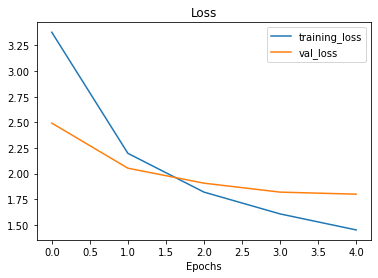

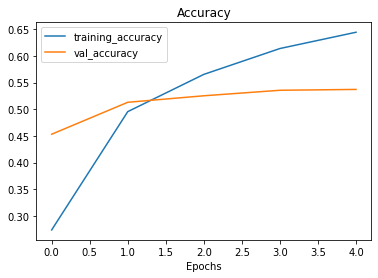

In [14]:
plot_loss_curves(history_all_classes_10_percent)

## Fine tuning

In [15]:
# unfreeze all of the layers in the base model
base_model.trainable=True

# refreeze every layer except the last 5 
for layer in base_model.layers[:-5]:
  layer.trainable =False

In [16]:
# Recompie model with lower learning 
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
# what layers in the model are trainable
for layer in model.layers:
  print(layer.name,layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_avg_pool_layer True
output_layer True


In [18]:
# check which layers are trainable in our base model
for layer_number,layer in enumerate(model.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 tf.math.truediv False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [19]:
# Fine-tune for 5 epochs more
fine_tune_epochs=10 # Since the model has already done 5 epochs of feature extraction

# Fine tuning our model
history_all_classes_10_percent_fine_tune= model.fit(train_data_all_10_percent,
                                                    epochs=fine_tune_epochs,
                                                    validation_data=test_data,
                                                    validation_steps=int(0.15*len(test_data)),
                                                    initial_epoch=history_all_classes_10_percent.epoch[-1]) 

Epoch 5/10
237/237 [==============================] - 65s 240ms/step - loss: 1.2173 - accuracy: 0.6869 - val_loss: 1.7642 - val_accuracy: 0.5453
Epoch 6/10
237/237 [==============================] - 54s 226ms/step - loss: 1.0954 - accuracy: 0.7105 - val_loss: 1.7462 - val_accuracy: 0.5477
Epoch 7/10
237/237 [==============================] - 49s 207ms/step - loss: 1.0055 - accuracy: 0.7286 - val_loss: 1.7089 - val_accuracy: 0.5567
Epoch 8/10
237/237 [==============================] - 48s 203ms/step - loss: 0.9513 - accuracy: 0.7468 - val_loss: 1.7069 - val_accuracy: 0.5580
Epoch 9/10
237/237 [==============================] - 47s 195ms/step - loss: 0.8740 - accuracy: 0.7655 - val_loss: 1.7473 - val_accuracy: 0.5543
Epoch 10/10
237/237 [==============================] - 48s 203ms/step - loss: 0.8419 - accuracy: 0.7773 - val_loss: 1.7170 - val_accuracy: 0.5588


In [20]:
all_classes_10_percent_fine_tune_results = model.evaluate(test_data)
all_classes_10_percent_fine_tune_results

790/790 [==============================] - 63s 79ms/step - loss: 1.4916 - accuracy: 0.6054


[1.4916267395019531, 0.6053861379623413]

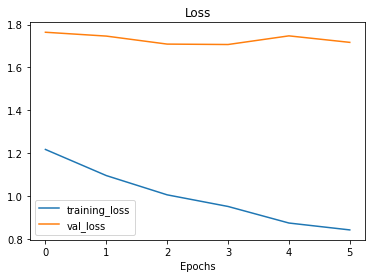

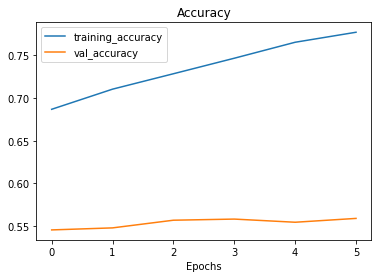

In [21]:
plot_loss_curves(history_all_classes_10_percent_fine_tune)

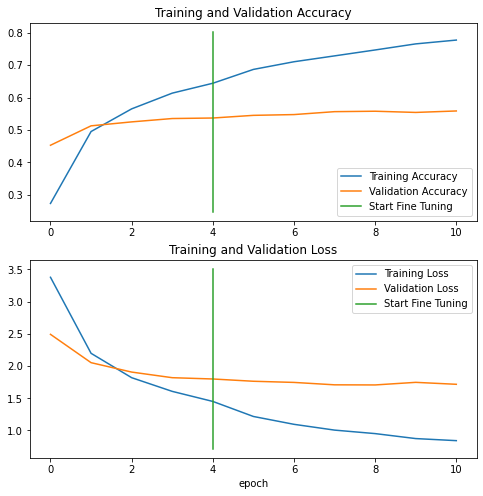

In [22]:
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

# Saving our fine-tuning model
to use our model in an external application,we'll need to save it and export it somewhere

In [23]:
# Save our fine_tuning model
model.save("drive/MyDrive/tensorflow_course/101_food_classes_10_percent_saved_big_dog_model")

In [24]:
# Load and evaluate saved model
loaded_model=tf.keras.models.load_model("drive/MyDrive/tensorflow_course/101_food_classes_10_percent_saved_big_dog_model")

In [25]:
#Evaluate loaded model and compare its performance to pre save one
loaded_model_results=loaded_model.evaluate(test_data)
loaded_model_results

790/790 [==============================] - 65s 80ms/step - loss: 1.4916 - accuracy: 0.6054


[1.4916269779205322, 0.6053861379623413]

# Evaluating the performance of the big dog model across all different classes

Let's make some predoction,visualize them and tehn laetr find out which predictions were the 'most' wrong

In [26]:
import tensorflow as tf

#downlaod pretrained model
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2023-03-14 21:10:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.127.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M  26.4MB/s    in 1.7s    

2023-03-14 21:10:26 (26.4 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [27]:
unzip_data("06_101_food_class_10_percent_saved_big_dog_model.zip")

In [28]:
# load in saved model
model =tf.keras.models.load_model("/content/06_101_food_class_10_percent_saved_big_dog_model")

In [29]:
#evaluate loaded model(the one we downloaded)
results_downloaded_model=model.evaluate(test_data)

790/790 [==============================] - 65s 80ms/step - loss: 1.8027 - accuracy: 0.6078


In [30]:
results_downloaded_model

[1.8027204275131226, 0.6077623963356018]

# Making prediction with our trained model

In [31]:
# Predictions with model
preds_probs= model.predict(test_data,verbose=1)

790/790 [==============================] - 65s 81ms/step


In [32]:
len(test_data)

790

In [33]:
#how mny predictions are there?
len(preds_probs)

25250

In [34]:
preds_probs.shape

(25250, 101)

In [35]:
#lets see what the first 10 predictions look like
preds_probs[:10]

array([[5.9542213e-02, 3.5742137e-06, 4.1377041e-02, ..., 1.4138676e-09,
        8.3530962e-05, 3.0897709e-03],
       [9.6401680e-01, 1.3753220e-09, 8.4780209e-04, ..., 5.4287098e-05,
        7.8361918e-12, 9.8465835e-10],
       [9.5925879e-01, 3.2533775e-05, 1.4866964e-03, ..., 7.1891412e-07,
        5.4397583e-07, 4.0275929e-05],
       ...,
       [4.7313288e-01, 1.2931191e-07, 1.4805571e-03, ..., 5.9750077e-04,
        6.6969005e-05, 2.3469400e-05],
       [4.4571895e-02, 4.7265519e-07, 1.2258518e-01, ..., 6.3498619e-06,
        7.5318503e-06, 3.6778899e-03],
       [7.2439003e-01, 1.9249673e-09, 5.2310970e-05, ..., 1.2291380e-03,
        1.5792693e-09, 9.6395343e-05]], dtype=float32)

In [36]:
# what does first prediction probability array look like?
preds_probs[:1],len(preds_probs[0]),sum(preds_probs[0]) 

(array([[5.95422126e-02, 3.57421368e-06, 4.13770415e-02, 1.06606324e-09,
         8.16142531e-09, 8.66396288e-09, 8.09274070e-07, 8.56529539e-07,
         1.98591606e-05, 8.09774235e-07, 3.17277338e-09, 9.86737973e-07,
         2.85322894e-04, 7.80490172e-10, 7.42304197e-04, 3.89164816e-05,
         6.47405386e-06, 2.49774143e-06, 3.78911900e-05, 2.06782616e-07,
         1.55384460e-05, 8.15073861e-07, 2.62306344e-06, 2.00106967e-07,
         8.38279050e-07, 5.42160706e-06, 3.73909870e-06, 1.31505775e-08,
         2.77615804e-03, 2.80519871e-05, 6.85621337e-10, 2.55748728e-05,
         1.66889717e-04, 7.64069696e-10, 4.04530176e-04, 1.31506805e-08,
         1.79573726e-06, 1.44482397e-06, 2.30628941e-02, 8.24670678e-07,
         8.53659003e-07, 1.71386728e-06, 7.05256207e-06, 1.84021616e-08,
         2.85534497e-07, 7.94839616e-06, 2.06815457e-06, 1.85251992e-07,
         3.36197594e-08, 3.15226032e-04, 1.04109295e-05, 8.54483289e-07,
         8.47418368e-01, 1.05554509e-05, 4.40948213

Our model outputs a prediction probability array (with N number of variables, where N is the number of classes) for each sample passed

In [37]:
# We get one prediction probability per class(in our case there's 101 prediction probability)
print(f"Number of prediction probabilities for sample 0: {len(preds_probs[0])}")
print(f"Number of prediction probabilites for sample 0 looks like:\n {preds_probs[0]}")
print(f"Highest predicted probabilty by the model for sample 0 : {preds_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 101
Number of prediction probabilites for sample 0 looks like:
 [5.95422126e-02 3.57421368e-06 4.13770415e-02 1.06606324e-09
 8.16142531e-09 8.66396288e-09 8.09274070e-07 8.56529539e-07
 1.98591606e-05 8.09774235e-07 3.17277338e-09 9.86737973e-07
 2.85322894e-04 7.80490172e-10 7.42304197e-04 3.89164816e-05
 6.47405386e-06 2.49774143e-06 3.78911900e-05 2.06782616e-07
 1.55384460e-05 8.15073861e-07 2.62306344e-06 2.00106967e-07
 8.38279050e-07 5.42160706e-06 3.73909870e-06 1.31505775e-08
 2.77615804e-03 2.80519871e-05 6.85621337e-10 2.55748728e-05
 1.66889717e-04 7.64069696e-10 4.04530176e-04 1.31506805e-08
 1.79573726e-06 1.44482397e-06 2.30628941e-02 8.24670678e-07
 8.53659003e-07 1.71386728e-06 7.05256207e-06 1.84021616e-08
 2.85534497e-07 7.94839616e-06 2.06815457e-06 1.85251992e-07
 3.36197594e-08 3.15226032e-04 1.04109295e-05 8.54483289e-07
 8.47418368e-01 1.05554509e-05 4.40948213e-07 3.74041701e-05
 3.53062496e-05 3.24890570e-05 6.

In [38]:
# get the pred classes of each label
pred_classes =preds_probs.argmax(axis=1)

# how do they look?
pred_classes[:10]

array([52,  0,  0, 80, 79, 61, 29,  0, 85,  0])

In [39]:
len(pred_classes)

25250

Now we've got a prediction array of all of our model's prediction, to evaluate them , we need to compare them to the original test dataset labels

In [40]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [41]:
#to get pur test labels we need to unravel our test_data Batchdataset
y_labels=[]
for image,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10] #look at the first 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [42]:
#how many y_labels are there?
len(y_labels)

25250

# Evaluating our model's predictions

one way to check that our model's prediction is in the same order as our test labels array is to find the accuracy score

In [43]:
results_downloaded_model

[1.8027204275131226, 0.6077623963356018]

In [44]:
# lets try scikit-learn's accuracy score function and see what it comes up with
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels,
                                  y_pred=pred_classes)
sklearn_accuracy

0.6077623762376237

In [45]:
#does this metric comes close to our model's evaluate results
import numpy as np
np.isclose(results_downloaded_model[1],sklearn_accuracy)

True

# Let's get visual :making confusion matrix
 

In [46]:
from helper_functions import make_confusion_matrix

In [47]:
# get the list of classes
class_names=test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [48]:
#Making some changes to make_confusion_matrix function to ensure the x-labels print vertically
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #change(plot x-labels vertically) ####
  plt.xticks(rotation=70,fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")
  

  

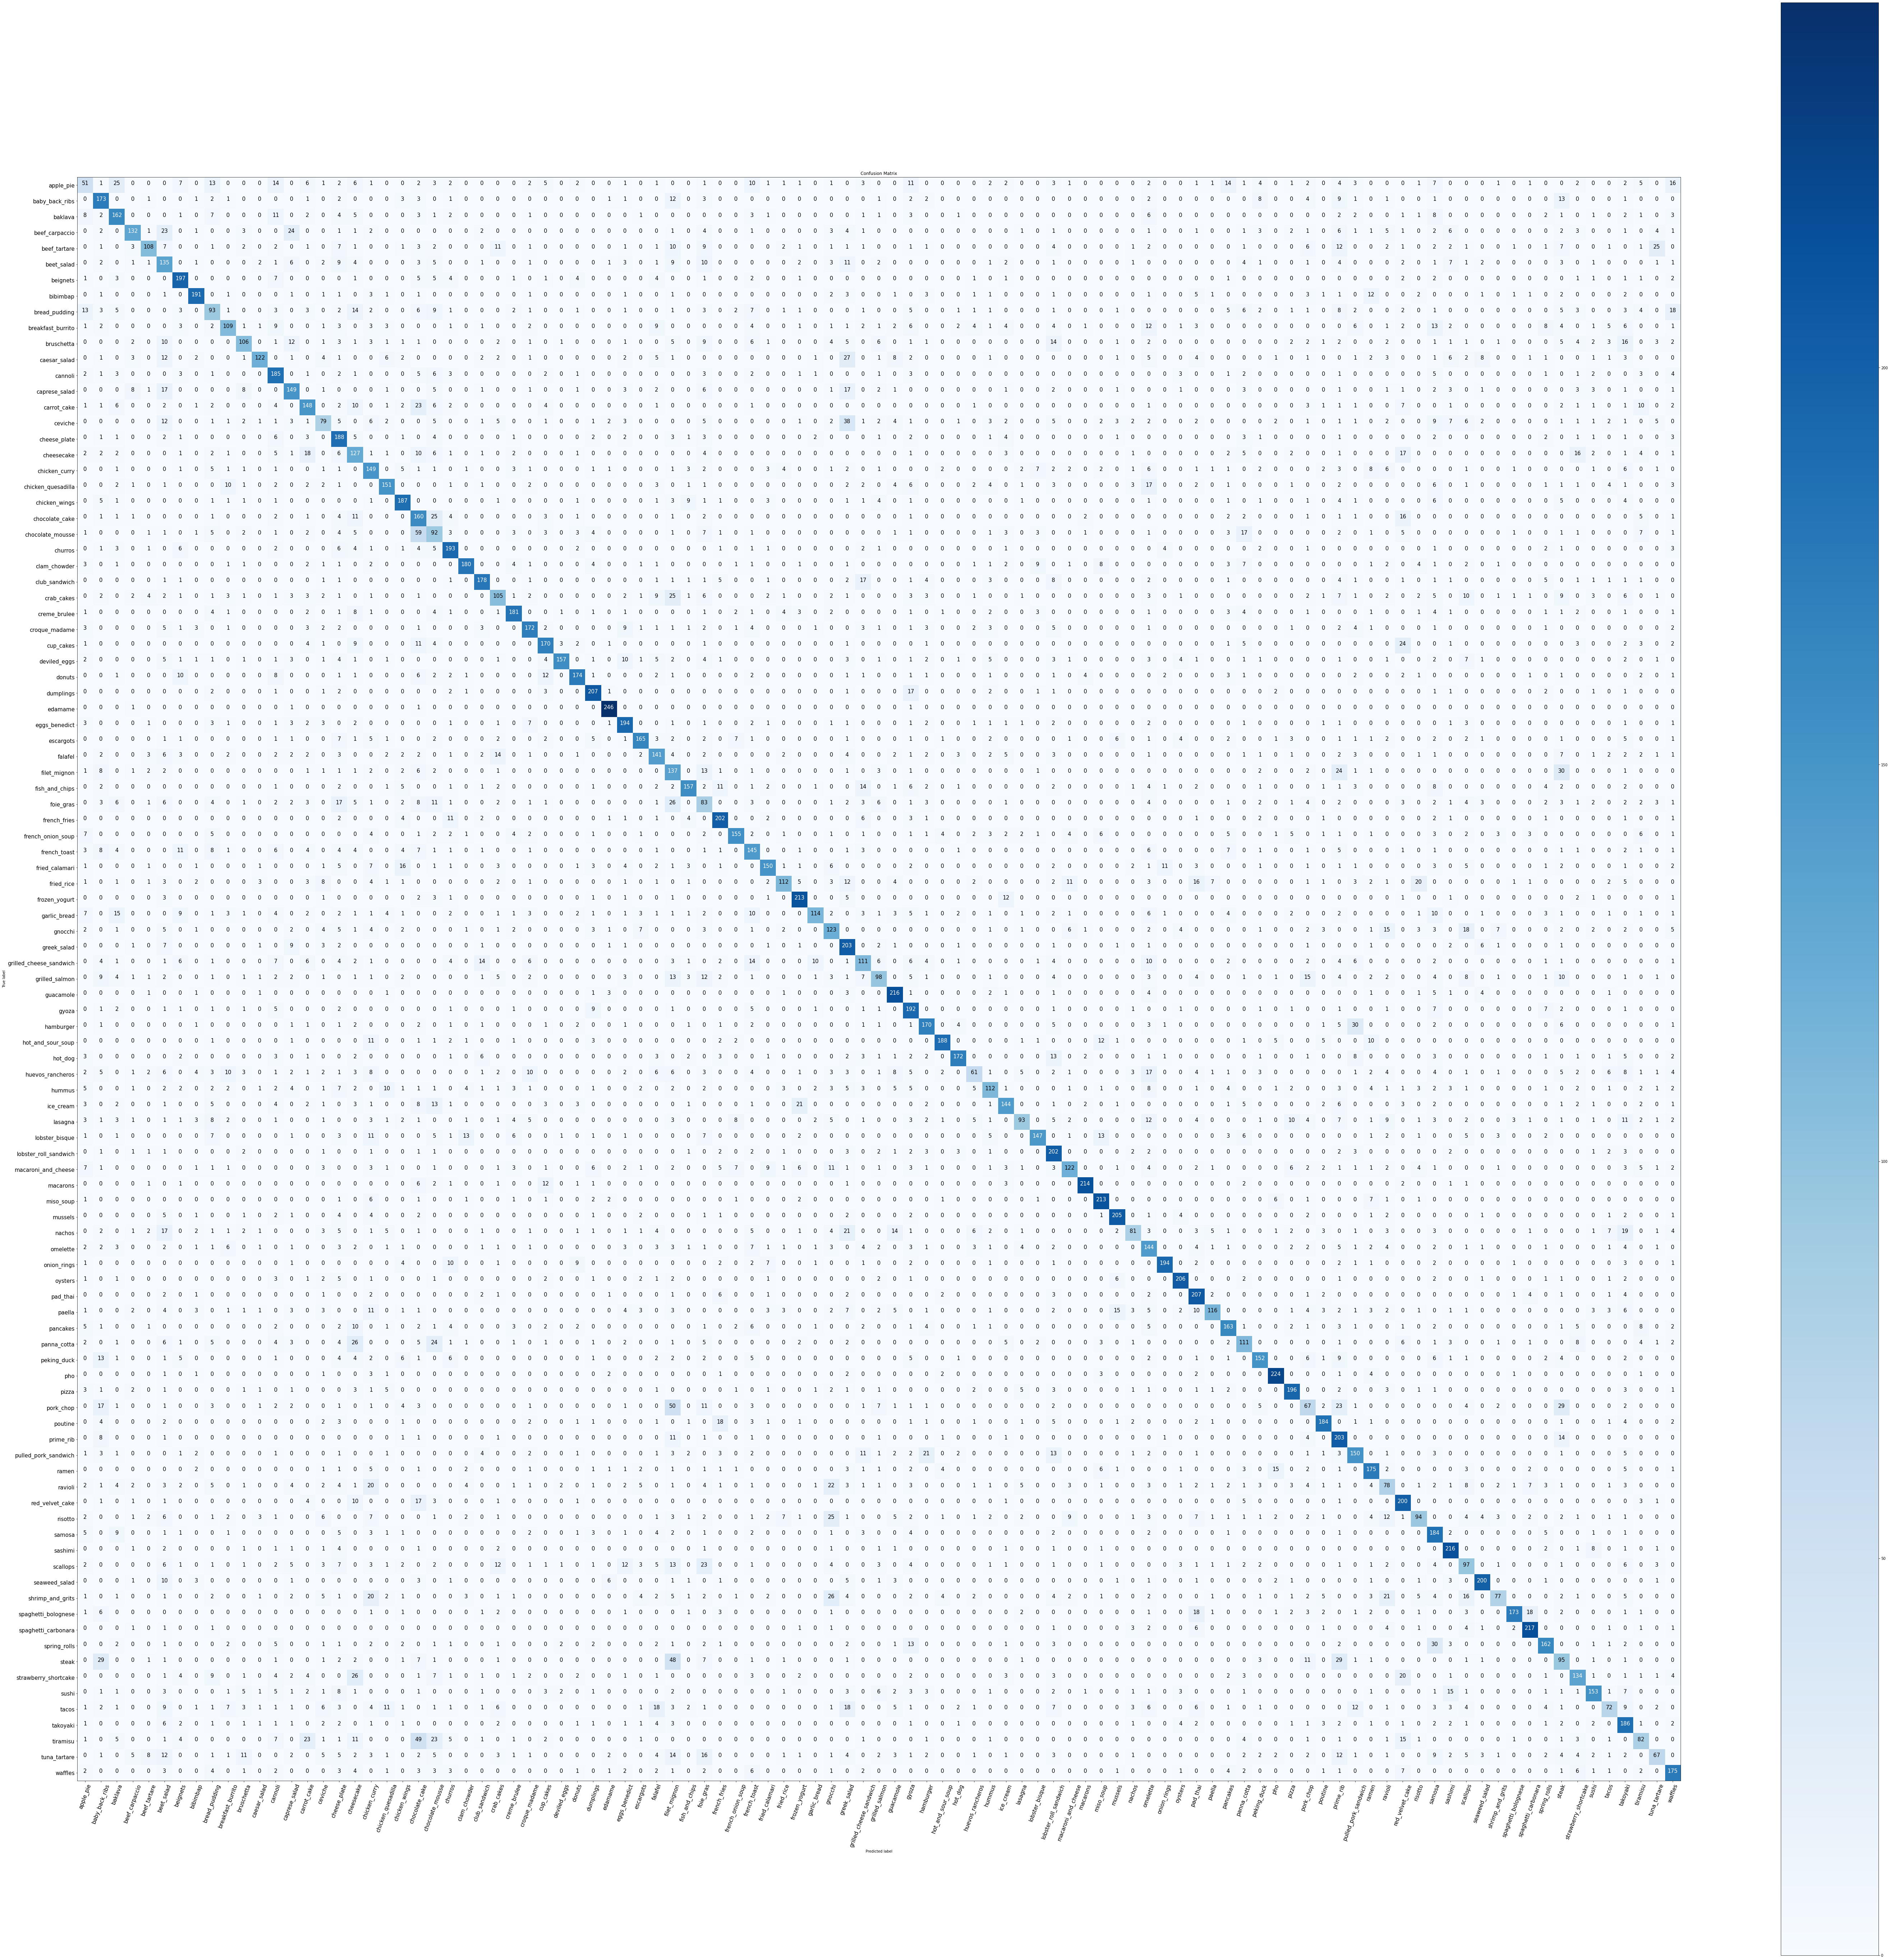

In [49]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100,100),
                      savefig=True)

# Lets keep the evaluation train going,time for classification report

Scikit-learn has a helpful function for acquiring many different classification per class(eg: precision,recall and f1-score) called classification report


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.29      0.20      0.24       250
           1       0.51      0.69      0.59       250
           2       0.56      0.65      0.60       250
           3       0.74      0.53      0.62       250
           4       0.73      0.43      0.54       250
           5       0.34      0.54      0.42       250
           6       0.67      0.79      0.72       250
           7       0.82      0.76      0.79       250
           8       0.40      0.37      0.39       250
           9       0.62      0.44      0.51       250
          10       0.62      0.42      0.50       250
          11       0.84      0.49      0.62       250
          12       0.52      0.74      0.61       250
          13       0.56      0.60      0.58       250
          14       0.56      0.59      0.57       250
          15       0.44      0.32      0.37       250
          16       0.45      0.75      0.57       250
          17       0.37    

The numbers above give a great class-byclass evaluration of our model's prediction but with so many classes,they're quite hard to understand.

How about we create a visualization to get a better understanding

In [51]:
# get a dictionary of the classification report
classification_report_dict = classification_report(y_labels,
                                              pred_classes,
                                              output_dict=True)
classification_report_dict

{'0': {'precision': 0.29310344827586204,
  'recall': 0.204,
  'f1-score': 0.24056603773584903,
  'support': 250},
 '1': {'precision': 0.5088235294117647,
  'recall': 0.692,
  'f1-score': 0.5864406779661017,
  'support': 250},
 '2': {'precision': 0.5625,
  'recall': 0.648,
  'f1-score': 0.6022304832713754,
  'support': 250},
 '3': {'precision': 0.7415730337078652,
  'recall': 0.528,
  'f1-score': 0.616822429906542,
  'support': 250},
 '4': {'precision': 0.7346938775510204,
  'recall': 0.432,
  'f1-score': 0.544080604534005,
  'support': 250},
 '5': {'precision': 0.34177215189873417,
  'recall': 0.54,
  'f1-score': 0.41860465116279066,
  'support': 250},
 '6': {'precision': 0.6677966101694915,
  'recall': 0.788,
  'f1-score': 0.7229357798165138,
  'support': 250},
 '7': {'precision': 0.8197424892703863,
  'recall': 0.764,
  'f1-score': 0.7908902691511386,
  'support': 250},
 '8': {'precision': 0.4025974025974026,
  'recall': 0.372,
  'f1-score': 0.3866943866943867,
  'support': 250},
 '9

In [52]:
class_names[70] 

'pad_thai'

Lets plot all our classes F1-scores...

In [53]:
#create an empty dictionary
class_f1_scores={}
#loop through classification report dictionary items
for k,v in classification_report_dict.items():
  if k =="accuracy":
    break
  else:
    #add class names and f1_scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.24056603773584903,
 'baby_back_ribs': 0.5864406779661017,
 'baklava': 0.6022304832713754,
 'beef_carpaccio': 0.616822429906542,
 'beef_tartare': 0.544080604534005,
 'beet_salad': 0.41860465116279066,
 'beignets': 0.7229357798165138,
 'bibimbap': 0.7908902691511386,
 'bread_pudding': 0.3866943866943867,
 'breakfast_burrito': 0.5117370892018779,
 'bruschetta': 0.5047619047619047,
 'caesar_salad': 0.6161616161616161,
 'cannoli': 0.6105610561056106,
 'caprese_salad': 0.5775193798449612,
 'carrot_cake': 0.574757281553398,
 'ceviche': 0.36744186046511623,
 'cheese_plate': 0.5654135338345864,
 'cheesecake': 0.42546063651591287,
 'chicken_curry': 0.5008403361344538,
 'chicken_quesadilla': 0.6411889596602972,
 'chicken_wings': 0.7123809523809523,
 'chocolate_cake': 0.45261669024045265,
 'chocolate_mousse': 0.3291592128801431,
 'churros': 0.7134935304990757,
 'clam_chowder': 0.7708779443254817,
 'club_sandwich': 0.734020618556701,
 'crab_cakes': 0.4625550660792952,
 'creme_brulee

In [54]:
#turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                         "f1-score":list(class_f1_scores.values())}).sort_values("f1-score",ascending =False)
f1_scores

,class_names,f1-score
33,edamame,0.937143
63,macarons,0.895397
75,pho,0.866538
91,spaghetti_carbonara,0.847656
69,oysters,0.834008
...,...,...
56,huevos_rancheros,0.339833
22,chocolate_mousse,0.329159
77,pork_chop,0.308756
39,foie_gras,0.297491


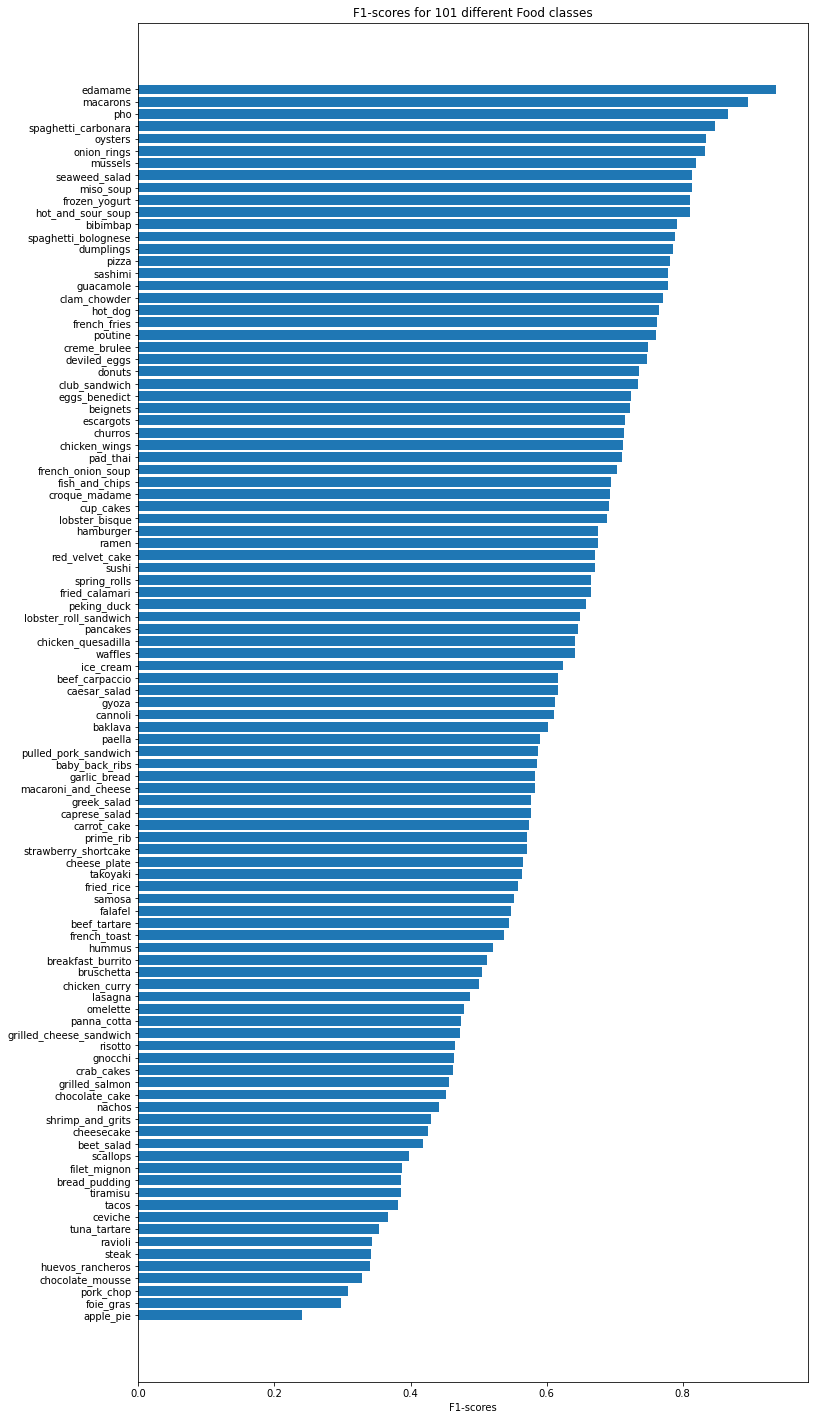

In [55]:
import matplotlib.pyplot as plt

fig,ax= plt.subplots(figsize=(12,25))
scores=ax.barh(range(len(f1_scores)),f1_scores["f1-score"].values)  #get f1-score values
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-scores")
ax.set_title("F1-scores for 101 different Food classes")
ax.invert_yaxis(); #reverse the order of our plot

## Visualizing predictions on custom images

Now this is the real test,how does our model go on food images not even in our test dataset(images of our own).

To visualize our model's predictions on our own images, we'll need a function to load and preprocess images,specifically it will need to:
* Read in a traget image filepath using tf.io.read()
* Turn the image into Tensor using tf.io.decode_image()
* Resize the image tensor to be the same size as the images our model has been trained on using tf.image.resize()
* Scale the image to get all the pixel value between 0 & 1(if necessary)

In [56]:
#create a function to load and prepare images
def load_and_prep_image(filename,img_shape=224,scale=True):
  """
  Reads in an Image from filename, turns into a tensor and reshapes into specified shape(img_shape,img_shape,color_channels=3).

  Args:
    filenaem(str) =path to target image
    image_shape(int): height/width dimension of target image size
    scale(bool): scale the pixel values from 0-255 to 0-1 or not
  Returns:
    Image tensor of shape(img_shape,img_shape,3)
  """
  #read in the image
  img=tf.io.read_file(filename)

  #decode image into tensor
  img = tf.io.decode_image(img,channels=3)

  #resize the image
  img=tf.image.resize(img,[img_shape,img_shape])

  #scale? yes/no
  if scale:
    # rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img  # no need to rescale images for EfficientNet models in Tensorflow

Now we've got a function to load and prepare target images,lets now write some code to visualize images,their target label and our model's predictions.

specifically, we'll write some code to:
1. Load a few random images from the test dataset
2. Make predictions on the loaded images
3. Plot the original images along with model's


1/1 [==============================] - 0s 28ms/step


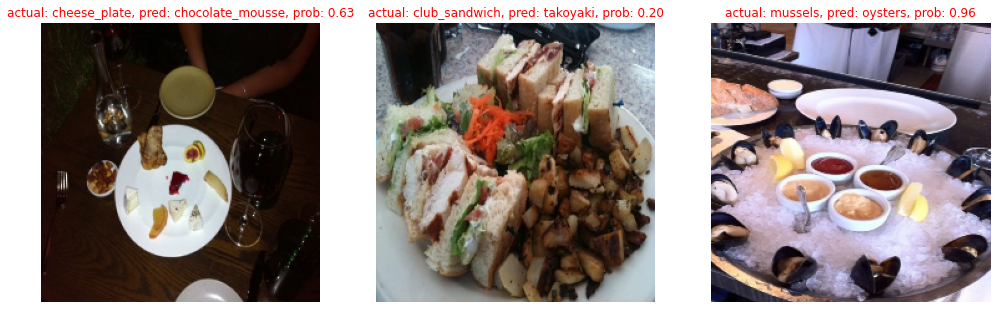

In [62]:
#make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);